# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #5
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, March 2nd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Problem 1: Monte Carlo and Simulation Revisited
In Homework #2, we used simulation to compute the expected values of functions of random variables. That is, given a random variable $X$, defined over $\mathbb{R}$, distributed according to the pdf $f_X$, and given a real-valued function of $X$, $h(X)$, we approximated $\mathbb{E}[h(X)]$ as follows
$$
\mathbb{E}[h(X)] = \int_{\mathbb{R}} h(x)f_X(x) dx \approx \frac{1}{N} \sum_{i=1}^N h(X_i), \quad X_i \sim f_X
$$

Now, suppose that, instead of being given the distribution $f_X$ and $h(X)$, you were simply asked to evaluate the following complex integral:
$$
I=\int_{0}^{\infty} \frac{x^4\, \sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x}}{2+(x-4)^2} \, dx 
$$
A clever way to apply our Monte Carlo techniques would be to split the integrand as $h(x)f_X(x)$, and then approximate the integral as we have done in Homework #2:
$$
I = \int_{0}^{\infty} h(x)\,f_X(x) dx  \approx \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i)$$ 
where the $X_i$'s are independently drawn from $f_X(x)$. 

We denote the approximation of the integral as follows
$$\hat{I} = \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i), \quad X_i \sim f_X.$$


### Part A:

Rewrite your integrand as a product of two functions, $h(x)g(x)$, which can then be expressed as $h(x)f_X(x)$, where $f_X$ is a pdf (you may use one of the splits we propose in Part B or create your own). Explain why your choice of $h$ is appropriate. Explain why your choice of $g$ is appropriate for creating a pdf $f_X$.

(**Hint:** think about what you would have to do do turn $g$ into a good pdf and $h$ into a function that can be evaluated at multiple samples from this pdf. Think about how to choose these two functions to make your Monte Carlo approximation of $I$ as accurate as possible.)




### Part A_Solution
When choose
$$
g(x) = \frac{1}{2+(x-4)^2}
$$

$$
h(x) = x^4\,\sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x}
$$



$$
I=\int_{0}^{\infty} \frac{x^4\, \sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x}}{2+(x-4)^2} \, dx =\int_{0}^{\infty} \frac{1}{2+(x-4)^2} (x^4\,\sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x})\, dx =\int_{0}^{\infty} h(x)\,f_X(x) dx
$$

To make $g(x)$ look like normalized pdf $f(x)$ with CDF = 1, we need to calculate the intergral of $g(x)$, and normalize $g(x)$ by dividing its intergral:
$$ f_X(x) = \frac {g(x)}{norm}= \frac{1}{1.95(2+(x-4)^2)}$$



Compared with other combinations of h(x) and g(x),
for example, $$ g_2(x) = xe^{-x}$$
$$ h_2(x) = \frac{x^3\, \sin\left(\sqrt{\ln{(x+1)}}\right)}{2+(x-4)^2} $$


or $$ g_3(x) = x^2e^{-x}$$
$$ h_3(x) = \frac{x^2\, \sin\left(\sqrt{\ln{(x+1)}}\right)}{2+(x-4)^2} $$

We can plot them and do comparisons:


1.9533769838932846


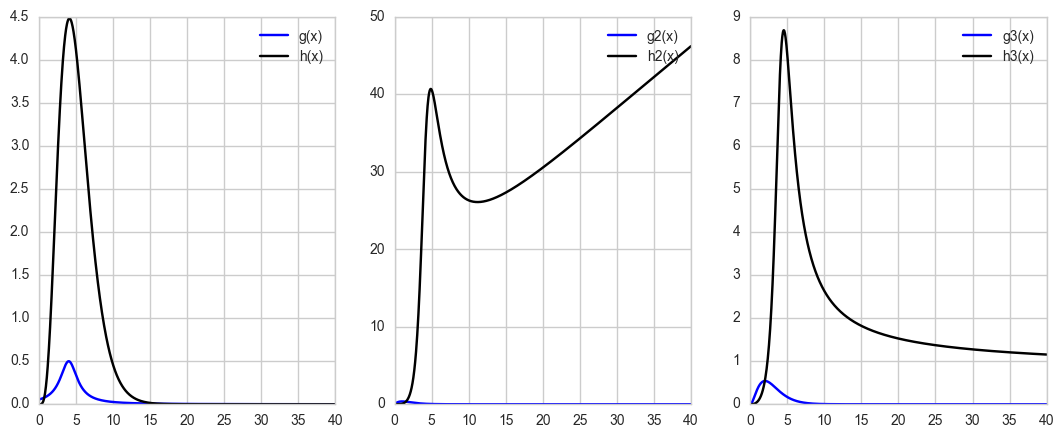

In [2]:
from scipy.integrate import quad
area = quad(lambda x: 1./(2+(x-4)**2), 0, 40)
norm = area[0]
print (area[0])
g = lambda x: 1/(2+(x-4)**2)
h = lambda x: x**4 * np.sin(np.sqrt(np.log(x+1))) * np.exp(-x)
xmax =40
xmin =0
x=np.linspace(xmin, xmax, 1000)

g2 = lambda x: np.exp(-x) * x
h2 = lambda x: x**3 * np.sin(np.sqrt(np.log(x+1)))/(2+(x-4)**2)

g3 = lambda x: np.exp(-x) * x**2
h3 = lambda x: x**2 * np.sin(np.sqrt(np.log(x+1)))/(2+(x-4)**2)

plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.plot(x, g(x), 'b', label=u'g(x)')
plt.plot(x, h(x), 'k', label=u'h(x)')
plt.legend()

plt.subplot(1,3,2)
plt.plot(x, g2(x), 'b', label=u'g2(x)')
plt.plot(x, h2(x), 'k', label=u'h2(x)')
#plt.plot( x, gh(x), 'r', label=u'g(x) * h(x)')
plt.legend()

plt.subplot(1,3,3)
plt.plot(x, g3(x), 'b', label=u'g3(x)')
plt.plot(x, h3(x), 'k', label=u'h3(x)')
#plt.plot( x, gh(x), 'r', label=u'g(x) * h(x)')
plt.legend()


### Summary

Since g(x) we chose is a bounded function, we can take g(x) as our pdf after normalizing. g(x) should have wider tail than h(x) becasue we hope that all the samples we draw from g(x) can cover the whole domain of h(x) without losing any information. In addtion, as shown in the first plot above, h(x) has similar distribution as g(x), which means we can choose more samples near the peak in order to make our estimate more accurate. Also, since the shape of the pdf $f(x) = \frac {g(x)}{norm}= \frac{1}{1.95(2+(x-4)^2)}$ looks very compact, samples drawn from f(x) are mostly distributed around 5 . In this case, our estimate can be more accurate and variance can be lower.


### Part B:

- Use $\frac{1}{2+(x-4)^2}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].


- Use $xe^{-x}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].


- Compare the variance of your two estimates. Which choice of $f_X$ is better? Explain why.

### Part B_Solution:

#### Use $\frac{1}{2+(x-4)^2}$ to create pdf $f_X$

In [3]:
def metropolis(p, qdraw, stepsize, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    accepted = 0
    for i in range(nsamp):
        x_star = qdraw(x_prev, stepsize)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
            accepted += 1
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted

50808


/Users/sunyuting/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


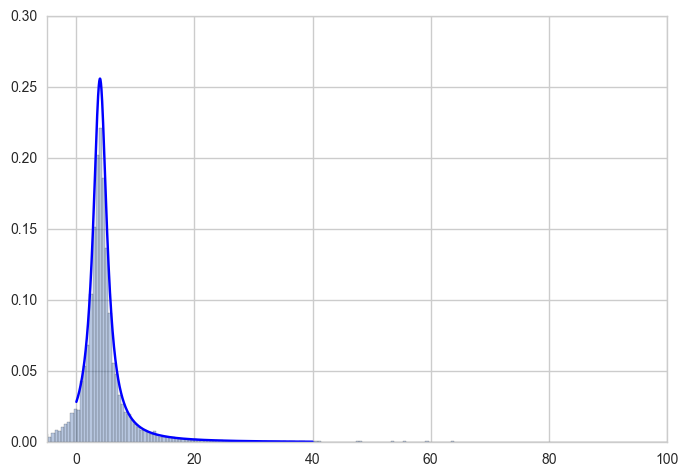

(-5, 100)

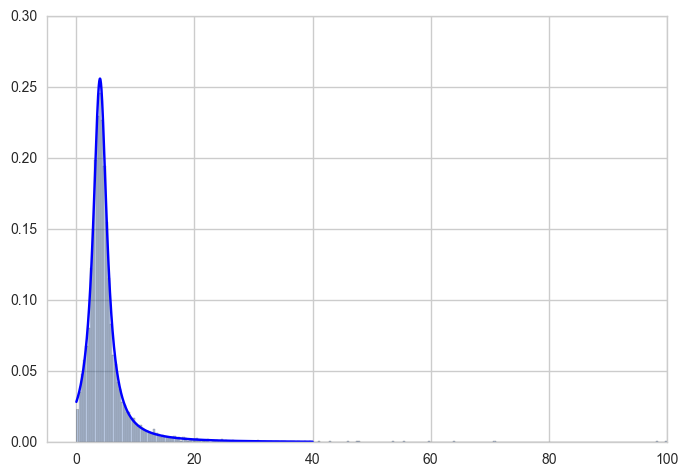

In [4]:
f = lambda x: 1/(2+(x-4)**2)/norm
def prop(x, step):
    return np.random.normal(x, step)

#x0=np.random.uniform()
x0 = 1
nsamps= 150000
samps, acc = metropolis(f, prop, 10., nsamps, x0)
print (acc)
burnin = int(nsamps*0.2)
thin = 10.
sampsthin=samps[burnin::thin]
#sampsthin = samps
plt.hist(sampsthin,bins=1000, alpha=0.4, label=u'MCMC distribution', normed=True) 
x=np.linspace(xmin, xmax, 1000)
plt.plot(x, (g(x)/norm), 'b', label=u'g(x)')
plt.xlim(-5,100)
plt.show()
#ori_sum = np.sum(sampsthin)
sample_new = []
for i in range (len(sampsthin)):
    if (sampsthin[i] > 0):
        sample_new.append(sampsthin[i])

plt.hist(sample_new,bins=1000, alpha=0.4, label=u'MCMC distribution', normed=True) 
#plt.show()
x=np.linspace(xmin, xmax, 1000)
plt.plot(x, (g(x)/norm), 'b', label=u'g(x)')
plt.xlim(-5,100)




Burning and Thinning

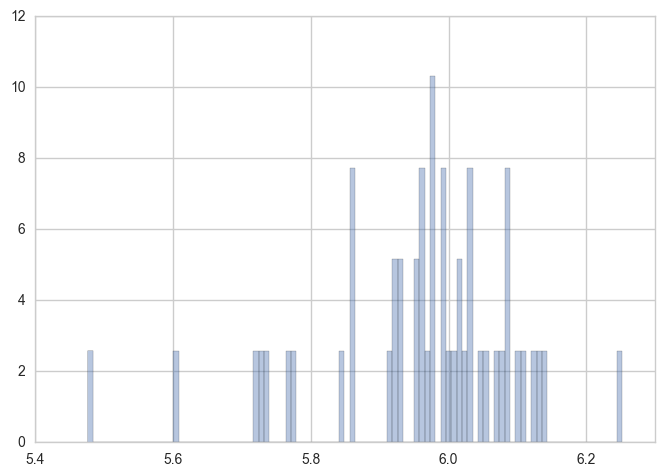

Empirical_value:  5.96096341767
Variance: 0.0195852544908


In [5]:
ite = 50
exp = list()

for i in range (ite):
    f = lambda x: 1./(2.+(x-4.)**2.)/norm
    def prop(x, step):
        return np.random.normal(x, step)   
    nsamps= 20000
    x0=np.random.uniform()
    #x0 = 1
    samps, acc = metropolis(f, prop, 10, nsamps, x0)
    # print (acc)
    burnin = int(nsamps*0.2)
    thin = 10
    sampsthin=samps[burnin::thin]
    # sum = 0
    # ori_sum = np.sum(sampsthin)
    sample_new = []
    for i in range (len(sampsthin)):
        if (sampsthin[i] > 0):
        #    sum +=1
            sample_new.append(sampsthin[i])
    hx = list()
    for i in range (len(sample_new)):
        hx.append(h(sample_new[i]))
    expecation = np.mean(hx) * norm
    exp.append(expecation)

plt.hist(exp,bins=100, alpha=0.4, label=u'Expectation distribution', normed=True) 

plt.show()
    
empirical_mean = np.mean(exp)
var = np.var(exp)

print ('Empirical_value: ',empirical_mean)
print ('Variance:', var)

#### Use $xe^{-x}$ to create your pdf $f_X$

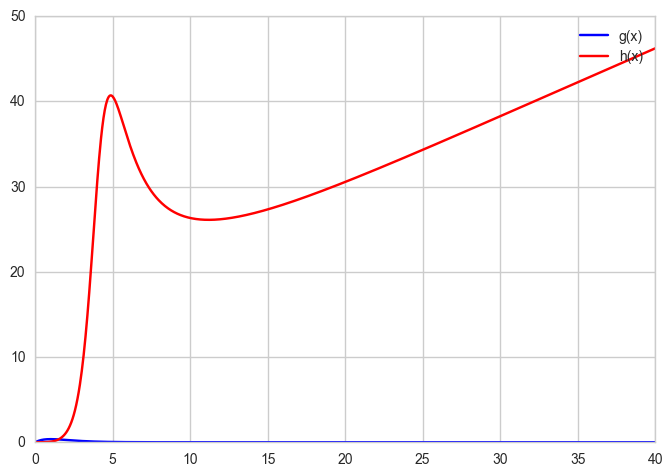

In [6]:
g1 = lambda x: np.exp(-x) * x
h1 = lambda x: x**3 * np.sin(np.sqrt(np.log(x+1)))/(2+(x-4)**2)
#gh = lambda x: x**4 * np.sin(np.sqrt(np.log(x+1))) * np.exp(-x) * ( 1/(2+(x-4)**2))

xmax =40
xmin =0

x=np.linspace(xmin, xmax, 1000)
plt.plot(x, g1(x), 'b', label=u'g(x)')
#plt.plot(x, h(x), 'k', label=u'h(x)')
plt.plot( x, h1(x), 'r', label=u'h(x)')
#plt.ylim(0,5)
plt.legend()

In [7]:
from scipy.integrate import quad
area = quad(lambda x: np.exp(-x) * x, 0, 40)
norm = area[0]
print (area[0])

0.9999999999999999


21151


(-5, 40)

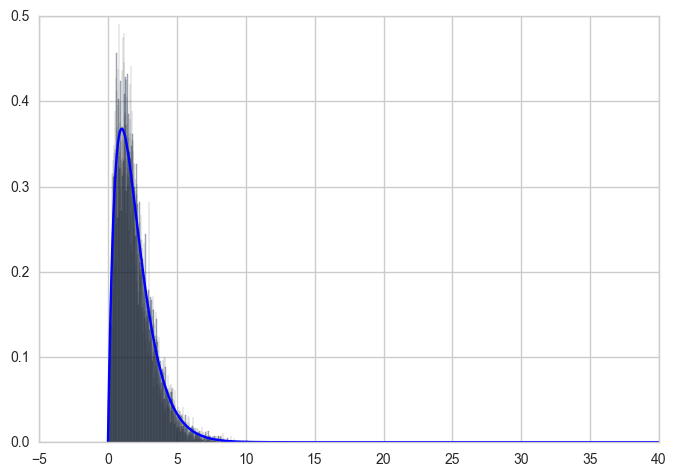

In [8]:
g1 = lambda x: np.exp(-x) * x
def prop(x, step):
    return np.random.normal(x, step)

#x0=np.random.uniform()
x0 = np.random.uniform()
nsamps= 150000
samps, acc = metropolis(g1, prop, 10, nsamps, x0)
print (acc)
burnin = int(nsamps*0.2)
thin = 10
sampsthin=samps[burnin::thin]
sampsthin = samps
plt.hist(sampsthin,bins=1000, alpha=0.4, label=u'MCMC distribution', normed=True) 
x=np.linspace(xmin, xmax, 1000)
plt.plot(x, g1(x), 'b', label=u'g(x)')
plt.xlim(-5,40)


/Users/sunyuting/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


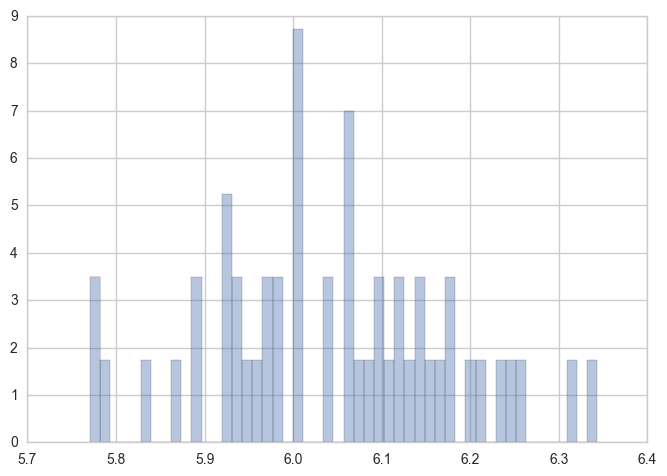

Empirical_value:  6.04450528513
Variance: 0.0179222626009


In [9]:
ite = 50
exp = list()

for i in range (ite):
    def prop(x, step):
        return np.random.normal(x, step)
    nsamps1 = 150000
    x0=np.random.uniform()
    samps1, acc1 = metropolis(g1, prop, 10., nsamps, x0)
    
    burnin1 = int(nsamps1*0.2)
    thin = 10.
    sampsthin1=samps1[burnin1::thin]
    
    hx = list()
    for i in range (len(sampsthin1)):
        hx.append(h1(sampsthin1[i]))
    expecation = np.mean(hx) 
    exp.append(expecation)

plt.hist(exp,bins=50, alpha=0.4, label=u'Expectation distribution', normed=True) 
#plt.xlim(4,6)
plt.show()
    
empirical_mean = np.mean(exp)
var = np.var(exp)

print ('Empirical_value: ',empirical_mean)
print ('Variance:', var)

### Comparision between two methods

As seen from the empirical mean and variance calculated based on two different combinations of g(x) and f(x), when $f(x) = \frac{1}{1.95(2+(x-4)^2)}$, the variance is lower than what we get using  $f(x) = xe^{-x}$. As we mentioned before,since the shape of the pdf $f(x) = \frac {g(x)}{norm}= \frac{1}{1.95(2+(x-4)^2)}$ looks very compact, samples drawn from f(x) are mostly distributed around 5. Additionally, the shape of g(x) and h(x) look similar, which means that we can draw more samples at the peak, so our estimate can be more accurate and variance can be lower.



## Problem 2: Metropolis Algorithm

Suppose we ask you to memorize the order of the top five movies on IMDB. When we quiz you on the order afterwards, you might not recall the correct order, but the mistakes you will tend to make in your recall can be modeled by simple probabilistic models.
  
Let's say that the top five movies are:  
1. *The Shawshank Redemption*
2. *The Godfather*
3. *The Godfather: Part II*
4. *The Dark Knight*
5. *Pulp Fiction*

Let's represent this ordering by the vector $\omega = (1,2,3,4,5)$. 

If you were to mistakenly recall the top five movies as:
2. *The Godfather*
3. *The Godfather: Part II*
5. *Pulp Fiction*
4. *The Dark Knight*
1. *The Shawshank Redemption*

We'd represent your answer by the vector $\theta = (2,3,5,4,1)$.

Now, we have a way of quantifying how wrong your answer can be. We define the Hamming distance between two top five rankings, $\theta, \omega$, as follows:
$$d(\theta, \omega) = \sum_{i=1}^5 \mathbb{I}_{\theta_i\neq \omega_i},$$ 
where $\mathbb{I}_{\theta_i\neq \omega_i}$ is the indicator function that returns 1 if $\theta_i\neq \omega_i$, and 0 otherwise.

For example, the Hamming distance between your answer and the correct answer is $d(\theta, \omega)=4$, because you only ranked *The Dark Knight* is correctly. 

Finally, let's suppose that the probability of giving a particular answer (expressed as $\theta$) is modeled as
$$ p(\theta \,|\, \omega, \lambda) \propto  e^{-\lambda\, d(\theta,\, \omega)}.$$


### Part A:

Implement an Metropolis algorithm to produce sample guesses from 500 individuals, with various $\lambda$ values, $\lambda=0.2, 0.5, 1.0$. What are the top five possible guesses?



### Part A_Solution

In [28]:
## posterior
import itertools
from itertools import combinations
w = [1,2,3,4,5]

rnorm = np.random.normal
runif = np.random.rand
def posterior(w, theta, lam):
    d = 0
    for i in range (len(w)):
        if (w[i] != theta[i]):
            d += 1 
    pos = np.exp(-lam*(d))    
    return pos

def metropolis (n_iterations, initial_values, lam):
    k = list()
    for i in range(120):
        k.append(i)
    a = [1,2,3,4,5]
    m = list(itertools.permutations(set(a)))
    n_params = len(initial_values)
    accepted = 0
    trace = np.empty((n_iterations+1, n_params))
    trace[0] = initial_values
    current_prob = posterior(w,trace[0],lam)
    for i in range(n_iterations):
        current_params = trace[i]
         # Get current value for parameter j
        p = trace[i].copy() 
        mm =  np.random.choice(k)
        aa = m[mm]
        theta = aa
        p = theta
        proposed_prob = posterior(w,p,lam)

        # Log-acceptance rate
        alpha = proposed_prob/current_prob

        # Sample a uniform random variate
        u = runif()
        #print (p)
        # Test proposed value
        if (u) < alpha:
            # Accept
            trace[i+1] = theta
            current_prob = proposed_prob
            accepted += 1
        else:
            # Stay put
            trace[i+1] = trace[i]

        # update p so we search the next dimension according
        # to the current result
        p = trace[i+1]
        
    
    return trace[1:], accepted

In [37]:
def sort(lam):
    
    theta_ini = [3,4,2,1,5]
    trace, accepted = metropolis(500,theta_ini,lam)
    #the = sorted(set(pp),key=pp.index)
    dic = {}
    for item in trace:
        item = tuple(item)
        if item in dic:
            dic[item] += 1
        else:
            dic[item] = 1
    dic.values()
    m = sorted(dic.items(), key=lambda x: x[1],reverse=True) 
    return m


In [38]:
lam  = 0.2
print ('When lambda = 0.2 , the top five possible guesses are:')
sort(lam)[:5]

When lambda = 0.2 , the top five possible guesses are:


[((1.0, 4.0, 3.0, 2.0, 5.0), 14),
 ((2.0, 3.0, 1.0, 4.0, 5.0), 11),
 ((3.0, 2.0, 1.0, 4.0, 5.0), 10),
 ((5.0, 2.0, 1.0, 3.0, 4.0), 9),
 ((1.0, 5.0, 3.0, 4.0, 2.0), 9)]

In [39]:
lam1  = 0.5
print ('When lambda = 0.5 , the top five possible guesses are:')
sort(lam1)[:5]

When lambda = 0.5 , the top five possible guesses are:


[((1.0, 2.0, 3.0, 4.0, 5.0), 23),
 ((1.0, 4.0, 3.0, 2.0, 5.0), 17),
 ((4.0, 2.0, 3.0, 1.0, 5.0), 17),
 ((3.0, 2.0, 4.0, 1.0, 5.0), 14),
 ((1.0, 2.0, 3.0, 5.0, 4.0), 13)]

In [40]:
lam2  = 1
print ('When lambda = 1 , the top five possible guesses are:')
sort(lam2)[:5]

When lambda = 1 , the top five possible guesses are:


[((1.0, 2.0, 3.0, 4.0, 5.0), 184),
 ((4.0, 2.0, 3.0, 1.0, 5.0), 28),
 ((5.0, 2.0, 3.0, 4.0, 1.0), 23),
 ((2.0, 1.0, 3.0, 4.0, 5.0), 19),
 ((1.0, 2.0, 3.0, 5.0, 4.0), 14)]

### Summary

As the results shown above, when lambda is small (=0.2), the guess of the top 1 order from 500 individuals is (1,4,3,2,5) which is not exactly the same as the desired answer (1,2,3,4,5). When we increase the value of lambda, the number of the correct order become greater and can be more easily classfied from other orders

### Part B:
Compute the probability that *The Shawshank Redemption* is ranked as the top movie (ranked number 1) by the Metropolis algorithm sampler. Compare the resulting probabilities for the various different $\lambda$ values. Summarize your findings.

In [15]:
theta_ini = [2,4,3,1,5]
l = [0.2,0.5,1.]
for i in range (len(l)):
    trace, accepted = metropolis(500,theta_ini,l[i])
    sum = 0
    for j in range (len(trace)):
        if (trace[j][0] == 1):
            sum +=1
    print ('Probability that The Shawshank Redemption is ranked as the top movie: %.3f when lambda = %.2f' %((sum/len(trace)),l[i]))


Probability that The Shawshank Redemption is ranked as the top movie: 0.284 when lambda = 0.20
Probability that The Shawshank Redemption is ranked as the top movie: 0.320 when lambda = 0.50
Probability that The Shawshank Redemption is ranked as the top movie: 0.424 when lambda = 1.00


### Summary

When $\lambda$ is increasing, the probability that The Shawshank Redemption is ranked as the top movie becomes higher, which is more close to our desired outcome. Since $ p(\theta \,|\, \omega, \lambda) \propto  e^{-\lambda\, d(\theta,\, \omega)}$,  when $\lambda$ is large，the effect caused by the error can be greater, which make each order be classified more clearly.